# Module 1

### TODO:
1. Load the Ames housing dataset.
2. Perform Exploratory Data Analysis and use descriptive statistics to describe the data.
3. Prepare the dataset for modeling by imputing missing values with the variable's mean value or any other value that you prefer.
4. Use the "cor()" function to produce a correlation matrix of the numeric values.
5. Produce a plot of the correlation matrix, and explain how to interpret it. (hint - check the corrplot or ggcorrplot plot libraries)
6. Make a scatter plot for the X continuous variable with the highest correlation with SalePrice. Do the same for the X variable that has the lowest correlation with SalePrice. Finally, make a scatter plot between X and SalePrice with the correlation closest to 0.5. Interpret the scatter plots and describe how the patterns differ.
7. Using at least 3 continuous variables, fit a regression model in R.
8. Report the model in equation form and interpret each coefficient of the model in the context of this problem.
9. Use the "plot()" function to plot your regression model. Interpret the four graphs that are produced.
10. Check your model for multicollinearity and report your findings. What steps would you take to correct multicollinearity if it exists?
11. Check your model for outliers and report your findings. Should these observations be removed from the model?
12. Attempt to correct any issues that you have discovered in your model. Did your changes improve the model, why or why not?
13. Use the all subsets regression method to identify the "best" model. State the preferred model in equation form.
14. Compare the preferred model from step 13 with your model from step 12. How do they differ? Which model do you prefer and why?

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


##### 1. Load the data and clean it up

In [2]:
raw_data = pd.read_csv("AmesHousing.csv")

In [3]:
raw_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
raw_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
# Define ordinal mappings based on the documentation for features like Overall Qual, Exter Qual, etc.
ordinal_mappings = {
    'Overall Qual': {'Very Excellent': 10, 'Excellent': 9, 'Very Good': 8, 'Good': 7, 
                     'Above Average': 6, 'Average': 5, 'Below Average': 4, 
                     'Fair': 3, 'Poor': 2, 'Very Poor': 1},
    'Exter Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Exter Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Bsmt Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Garage Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'Garage Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'Pool QC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
}

# Apply ordinal mappings to columns if they exist in the dataset
for col, mapping in ordinal_mappings.items():
    if col in raw_data.columns:
        raw_data[col] = raw_data[col].map(mapping)


# Define the feature sets again, checking if they exist in the dataframe
numeric_features = [col for col in ['Gr Liv Area', 'Year Built', 'Total Bsmt SF', 
                                    'Garage Area', 'Full Bath', 'Lot Area', 'SalePrice'] if col in raw_data.columns]

categorical_features = [
    'Overall Qual','MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 
    'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 
    'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 
    'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Sale Type', 
    'Sale Condition'
]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
raw_data[numeric_features] = imputer.fit_transform(raw_data[numeric_features])

# Create dummy variables for categorical features, only if they exist in df
categorical_features = [col for col in categorical_features if col in raw_data.columns]
df_encoded = pd.get_dummies(raw_data, columns=categorical_features, drop_first=True)

# Drop columns with high NAs ~>100 from 2900 records and the PID column if present
if 'PID' in df_encoded.columns:
    df_encoded.drop(columns=["PID"], inplace=True)
null_counts = df_encoded.isnull().sum()
null_cols = null_counts[null_counts > 100]
df_encoded.drop(columns=null_cols.index, inplace=True)

NameError: name 'raw_data' is not defined

In [16]:
df_encoded.dropna(inplace=True)

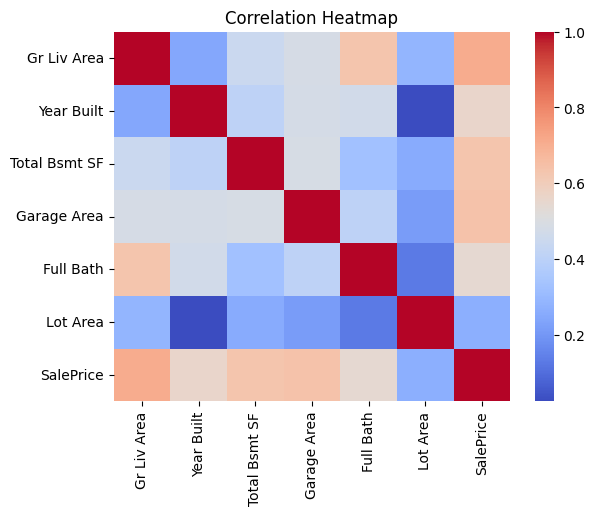

In [19]:
correlation_matrix = raw_data[numeric_features].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

SalePrice        1.000000
Gr Liv Area      0.706780
Garage Area      0.640385
Total Bsmt SF    0.632105
Year Built       0.558426
Full Bath        0.545604
Lot Area         0.266549
Name: SalePrice, dtype: float64


/var/folders/5y/pjrsw60n65124xb_fjnr_68m0000gn/T/ipykernel_34136/2190363481.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  moderate_corr = corr_with_saleprice.iloc[(corr_with_saleprice - 0.5).abs().argsort()[0]]


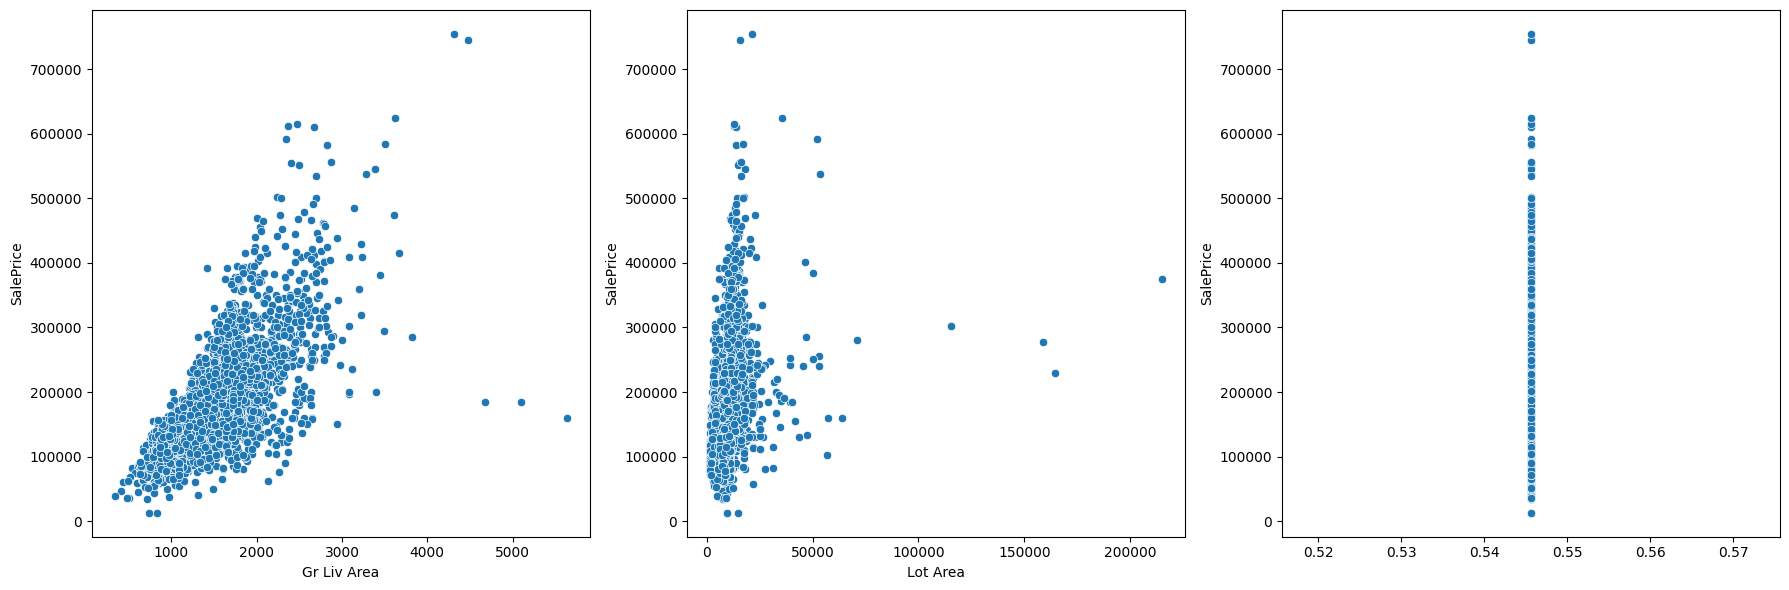

In [28]:
# Identify variables with highest, lowest, and moderate correlation
corr_with_saleprice = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
print(corr_with_saleprice)
highest_corr = corr_with_saleprice.index[1]  # Excluding SalePrice itself
lowest_corr = corr_with_saleprice.index[-1]
moderate_corr = corr_with_saleprice.iloc[(corr_with_saleprice - 0.5).abs().argsort()[0]]

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=df_encoded, x=highest_corr, y='SalePrice', ax=axes[0])
sns.scatterplot(data=df_encoded, x=lowest_corr, y='SalePrice', ax=axes[1])
sns.scatterplot(data=df_encoded, x=moderate_corr, y='SalePrice', ax=axes[2])
plt.tight_layout()
plt.show()

In [42]:
X = df_encoded[['Gr Liv Area', 'Total Bsmt SF', 'Garage Area']]
y = df_encoded['SalePrice']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

Coefficients: [ 68.86227809  54.58576523 105.14455132]
Intercept: -29593.64369306396
R-squared: 0.6794746859699713


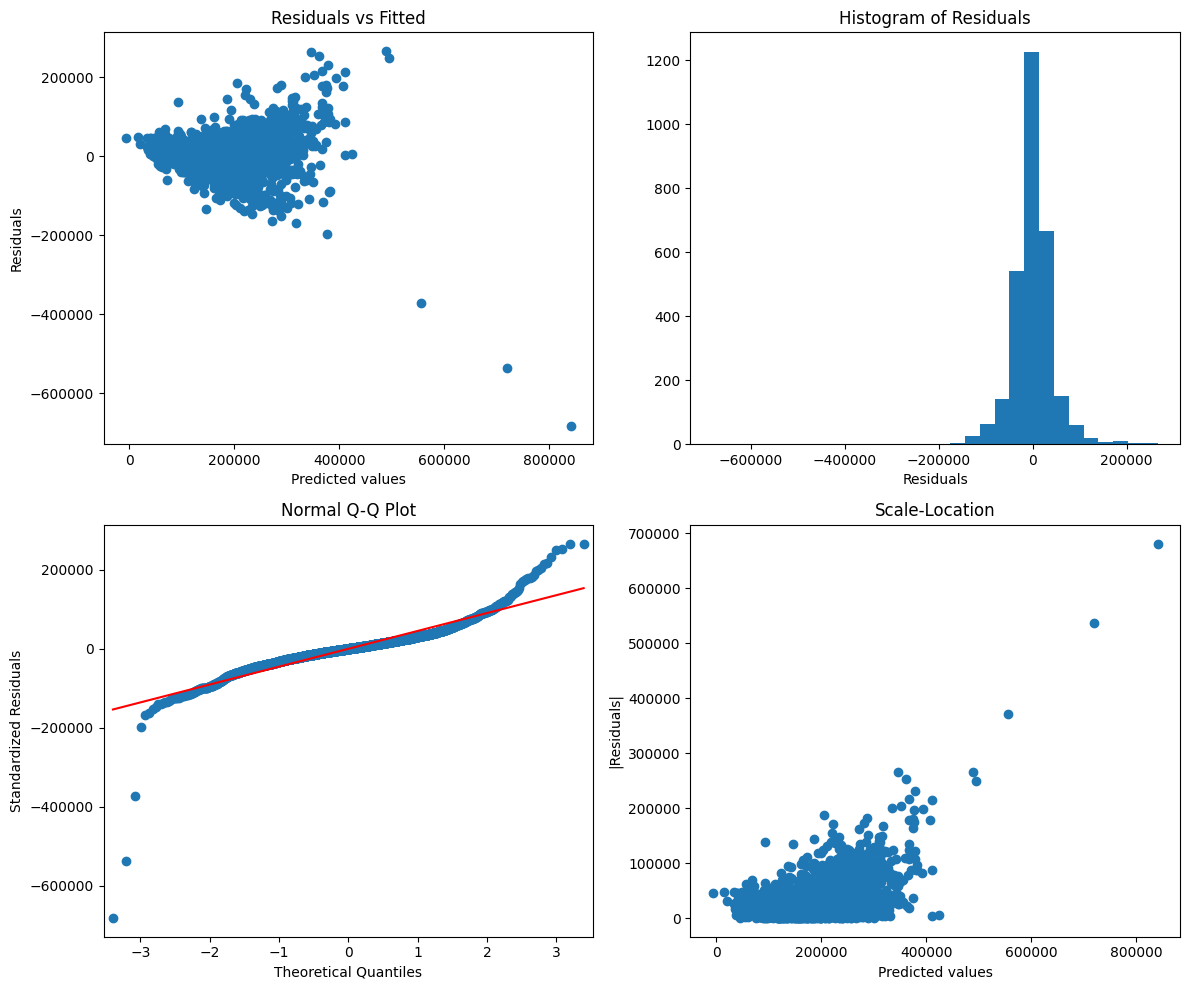

In [31]:
y_pred = model.predict(X)
residuals = y - y_pred

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].scatter(y_pred, residuals)
axes[0, 0].set_xlabel('Predicted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

axes[0, 1].hist(residuals, bins=30)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_title('Histogram of Residuals')

sm.qqplot(residuals, line='s', ax=axes[1, 0])  # Plot on existing axis
axes[1, 0].set_title('Normal Q-Q Plot')
axes[1, 0].set_xlabel('Theoretical Quantiles')
axes[1, 0].set_ylabel('Standardized Residuals')

axes[1, 1].scatter(y_pred, np.abs(residuals))
axes[1, 1].set_xlabel('Predicted values')
axes[1, 1].set_ylabel('|Residuals|')
axes[1, 1].set_title('Scale-Location')

plt.tight_layout()
plt.show()

In [43]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         feature       VIF
0    Gr Liv Area  9.807488
1  Total Bsmt SF  8.727129
2    Garage Area  8.478651


In [33]:
Q1 = df_encoded['SalePrice'].quantile(0.25)
Q3 = df_encoded['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_encoded[(df_encoded['SalePrice'] < lower_bound) | (df_encoded['SalePrice'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 137


In [45]:
y_log = np.log(y)
model_improved = Ridge(alpha=1.0)
model_improved.fit(X, y_log)

print("Improved model R-squared:", model_improved.score(X, y_log))

Improved model R-squared: 0.6721558066503527


In [40]:
df_cleaned = df_encoded[(df_encoded['SalePrice'] >= lower_bound) & (df_encoded['SalePrice'] <= upper_bound)]
X = df_cleaned[['Gr Liv Area', 'Total Bsmt SF', 'Garage Area']]
y = df_cleaned['SalePrice']
y_log = np.log(y)

model = LinearRegression()
model.fit(X, y_log)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y_log))

Coefficients: [0.00031816 0.00023879 0.00055592]
Intercept: 11.017744099452589
R-squared: 0.5905192215098718


In [2]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(df_encoded[numeric_features].drop('SalePrice', axis=1), y_log)

selected_features = df_encoded[numeric_features].drop('SalePrice', axis=1).columns[rfe.support_]
print("Selected features:", selected_features)

X_best = df_encoded[selected_features]
model_best = LinearRegression()
model_best.fit(X_best, y_log)

y_pred = model_best.predict(X_best)
# Calculate R²
r2 = r2_score(y_log, y_pred)


n = X.shape[0]  
k = X.shape[1]  

# Calculate adjusted R²
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f'Best model R-squared: {r2}')
print(f'Adjusted R²: {adjusted_r2}')

NameError: name 'RFE' is not defined